#data processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/DSA 4265"

'(B)Womens Clothing b2c binary class - scoring 2500 rows - 120121.csv'
'(B)Womens Clothing b2c binary class - training 12500 rows - 120121.csv'
'DataRobot AI Report - 2022.02.06.docx'
'DataRobot Deployment Report for Recommended model for HighestRated_target on Test.docx'
'DSA4265 Assignment 1.gdoc'
'Feature Impact for Keras Deep Residual Neural Network Classifier using Training Schedule (2 Layers_ 512, 512 Units) using 2500 rows.zip'
 Nystroem_pred.csv
 result-61ff66567f803ab810a24623.csv
'(S)Womens Clothing b2c binary class - scoring 2500 rows - 120121.xlsx'
'(S)Womens Clothing b2c binary class - training 12500 rows - 120121.xlsx'
'Womens Clothing b2b Retail - binary class - highest rated purchases - Project Overview and Instructions - 120121.pdf'
'Womens Clothing - b2c retail - binary class - data dictionary 120121.pdf'
'Womens Clothing Population-Audit Report - 120121.pdf'


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
test_data = pd.read_csv('/content/drive/My Drive/DSA 4265/(B)Womens Clothing b2c binary class - scoring 2500 rows - 120121.csv')

In [ ]:
pred = pd.read_csv("/content/drive/My Drive/DSA 4265/Nystroem_pred.csv")

In [ ]:
test_data['pred']=pred['PredictedLabel']

In [ ]:
test_data

,HighestRated_target,ClothingID,Age,Review_short,Review_long,Recommended,PositiveFeedbackCount,DivisionName,DepartmentName,ClassName,pred
0,0-not highest rating,1065,47,"Nice, but not for my body",I took these out of the package and wanted the...,1,3,General,Bottoms,Pants,0
1,0-not highest rating,847,33,"Cute, crisp shirt","If this product was in petite, i would get the...",1,2,General,Tops,Blouses,1
2,0-not highest rating,368,33,NaN,I am pregnant and i thought this would be a gr...,0,3,Initmates,Intimate,Intimates,0
3,0-not highest rating,1095,36,NaN,"I got this in the petite length, size o, and i...",1,0,General Petite,Dresses,Dresses,1
4,0-not highest rating,845,44,NaN,I usually wear a medium and bought a small. it...,0,0,General Petite,Tops,Blouses,0
...,...,...,...,...,...,...,...,...,...,...,...
2495,1-highest rating,1020,39,"Beautiful, unique piece",Love it! i am 125# and usually a size 2-4 or 2...,1,0,General Petite,Bottoms,Skirts,1
2496,1-highest rating,1104,39,Soft and warm,I like the contrast of the skirt with the bodi...,1,7,General Petite,Dresses,Dresses,1
2497,1-highest rating,1104,42,Compliments,I wore this dress to work the other day and go...,1,3,General Petite,Dresses,Dresses,1
2498,1-highest rating,1078,41,Falls nicely,I bought this dress for work and post work hap...,1,0,General,Dresses,Dresses,1


In [ ]:
new_data = test_data[['ClothingID', 'Age', 'DivisionName', 'DepartmentName', 'ClassName', 'pred', 'HighestRated_target']]

In [ ]:
new_data['Age'] = pd.cut(new_data['Age'], bins=[10,20,30,40,50,60,70,80,90,99])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_data

,ClothingID,Age,DivisionName,DepartmentName,ClassName,pred,HighestRated_target
0,1065,"(40, 50]",General,Bottoms,Pants,0,0-not highest rating
1,847,"(30, 40]",General,Tops,Blouses,1,0-not highest rating
2,368,"(30, 40]",Initmates,Intimate,Intimates,0,0-not highest rating
3,1095,"(30, 40]",General Petite,Dresses,Dresses,1,0-not highest rating
4,845,"(40, 50]",General Petite,Tops,Blouses,0,0-not highest rating
...,...,...,...,...,...,...,...
2495,1020,"(30, 40]",General Petite,Bottoms,Skirts,1,1-highest rating
2496,1104,"(30, 40]",General Petite,Dresses,Dresses,1,1-highest rating
2497,1104,"(40, 50]",General Petite,Dresses,Dresses,1,1-highest rating
2498,1078,"(40, 50]",General,Dresses,Dresses,1,1-highest rating


In [ ]:
groups

In [ ]:
groups = new_data.groupby(['DivisionName', 'DepartmentName', 'ClassName', 'Age', 'pred'])

In [ ]:
lgrouped = list(groups)

In [ ]:
lgrouped[2]

(('General', 'Bottoms', 'Jeans', Interval(20, 30, closed='right'), 1),
       ClothingID       Age DivisionName  ... ClassName pred   HighestRated_target
 160         1033  (20, 30]      General  ...     Jeans    1  0-not highest rating
 454         1035  (20, 30]      General  ...     Jeans    1  0-not highest rating
 1376        1035  (20, 30]      General  ...     Jeans    1      1-highest rating
 1565        1025  (20, 30]      General  ...     Jeans    1      1-highest rating
 1813        1022  (20, 30]      General  ...     Jeans    1      1-highest rating
 1992        1030  (20, 30]      General  ...     Jeans    1      1-highest rating
 2027        1027  (20, 30]      General  ...     Jeans    1      1-highest rating
 2365        1022  (20, 30]      General  ...     Jeans    1      1-highest rating
 2439        1037  (20, 30]      General  ...     Jeans    1      1-highest rating
 2455        1025  (20, 30]      General  ...     Jeans    1      1-highest rating
 
 [10 rows x 7 

In [ ]:
train_data = pd.read_csv("/content/Womens Clothing b2c binary class - training 12500 rows - 120121.csv")

In [ ]:
train_data.describe()

,ClothingID,Age,Recommended,PositiveFeedbackCount
count,12500.000000,12500.000000,12500.00000,12500.000000
mean,917.382320,43.190800,0.82304,2.521760
std,204.342581,12.241712,0.38165,5.745385
min,1.000000,18.000000,0.00000,0.000000
25%,860.000000,34.000000,1.00000,0.000000
50%,936.000000,41.000000,1.00000,1.000000
75%,1078.000000,52.000000,1.00000,3.000000
max,1205.000000,99.000000,1.00000,122.000000


In [ ]:
train_data[train_data['ClassName']=='Dresses'].to_csv("dress.csv")

#general data exploration

(array([  23., 1509., 4180., 3189., 2135., 1221.,  186.,   46.,   11.]),
 array([10, 20, 30, 40, 50, 60, 70, 80, 90, 99]),
 <a list of 9 Patch objects>)

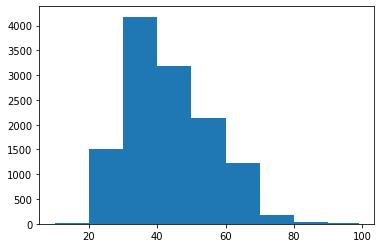

In [ ]:
plt.hist(x=train_data['Age'], bins=[10,20,30,40,50,60,70,80,90,99])

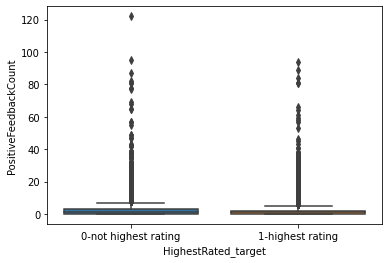

In [ ]:
sns.boxplot(x='HighestRated_target',y='PositiveFeedbackCount',data=train_data)

As can be seen, our main audience is within the (30, 50] age demographic; indicating that the main profit base would also be from them.

Going by that logic, we should then choose individuals from that age demographic to form the basis of our observations.

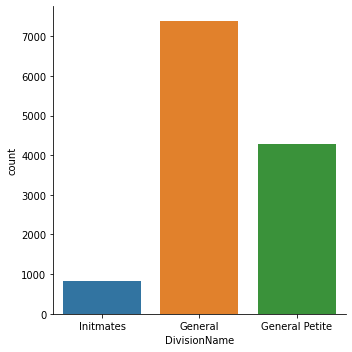

In [ ]:
sns.catplot(x="DivisionName", kind="count", data=train_data)

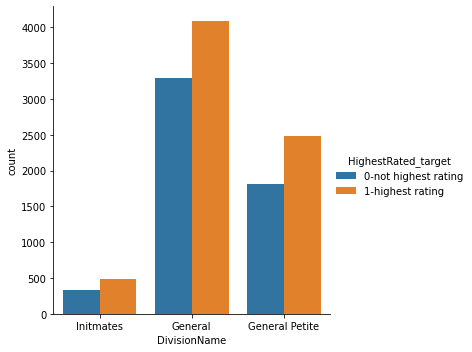

In [ ]:
sns.catplot(x="DivisionName", kind="count", hue="HighestRated_target", data=train_data)
#plt.xticks(rotation=45)

Basing on our initial analysis of the Division of Clothing, we can surmise then that the general focus would be on the General section. Pun intended.

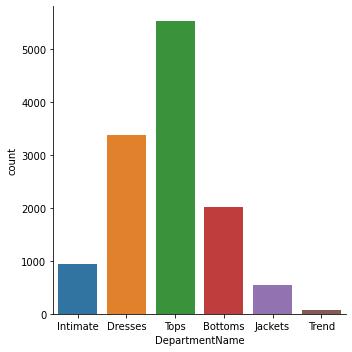

In [ ]:
sns.catplot(x="DepartmentName", kind="count", data=train_data)

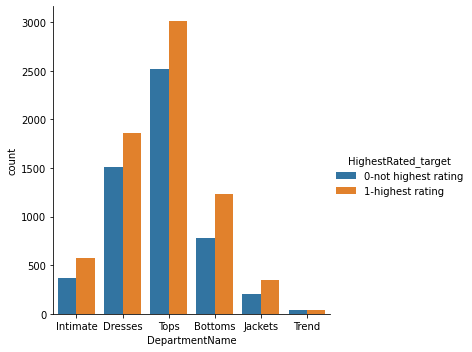

In [ ]:
sns.catplot(x="DepartmentName", kind="count", hue="HighestRated_target", data=train_data)

Looking at the departments, Tops and Dresses are also the main drawing factor of clothing.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

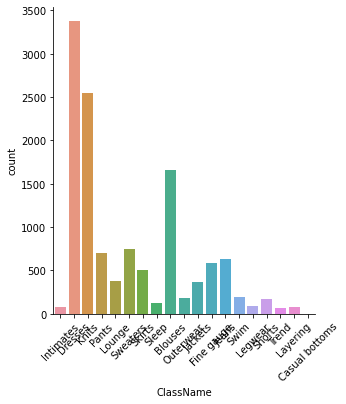

In [ ]:
sns.catplot(x="ClassName", kind="count", data=train_data)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

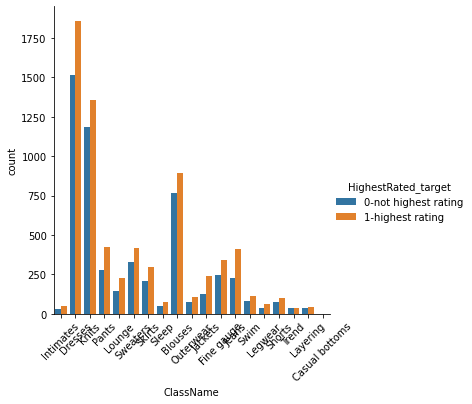

In [ ]:
sns.catplot(x="ClassName", kind="count", hue="HighestRated_target", data=train_data)
plt.xticks(rotation=45)

#insight

##division

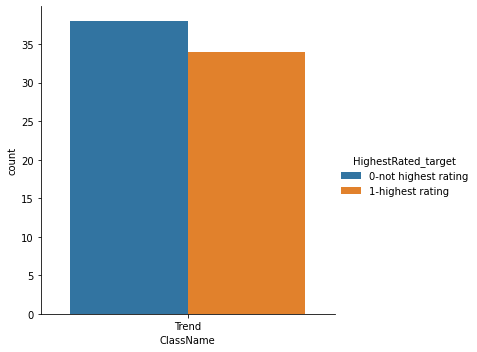

In [ ]:
sns.catplot(x="ClassName", kind="count", hue="HighestRated_target", data=train_data[train_data['ClassName']=='Trend'])

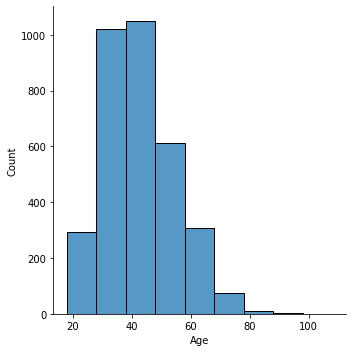

In [ ]:
sns.displot(train_data[train_data['ClassName']=='Dresses'], x="Age", binwidth=10)

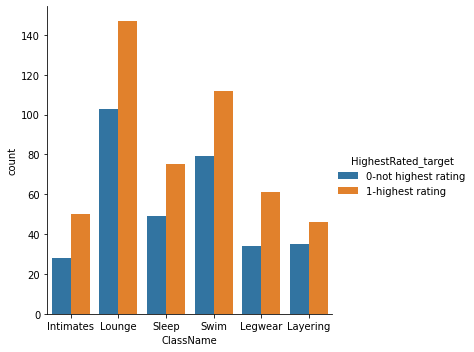

In [ ]:
sns.catplot(x="ClassName", kind="count", hue="HighestRated_target", data=train_data[train_data['DivisionName']=='Initmates'])

In [ ]:
train_data[(train_data['DivisionName']=='Initmates') & (train_data['ClassName']=='Lounge')].count

<bound method DataFrame.count of         HighestRated_target  ClothingID  ...  DepartmentName ClassName
9      0-not highest rating         697  ...        Intimate    Lounge
47     0-not highest rating         126  ...        Intimate    Lounge
109    0-not highest rating         149  ...        Intimate    Lounge
192    0-not highest rating         805  ...        Intimate    Lounge
193    0-not highest rating         805  ...        Intimate    Lounge
...                     ...         ...  ...             ...       ...
12226      1-highest rating         658  ...        Intimate    Lounge
12262      1-highest rating         455  ...        Intimate    Lounge
12281      1-highest rating         310  ...        Intimate    Lounge
12377      1-highest rating         709  ...        Intimate    Lounge
12386      1-highest rating         709  ...        Intimate    Lounge

[250 rows x 10 columns]>

In [ ]:
train_data[(train_data['DivisionName']=='Initmates') & (train_data['ClassName']=='Legwear')].count

<bound method DataFrame.count of         HighestRated_target  ClothingID  ...  DepartmentName ClassName
152    0-not highest rating         117  ...        Intimate   Legwear
183    0-not highest rating         745  ...        Intimate   Legwear
766    0-not highest rating         153  ...        Intimate   Legwear
1322   0-not highest rating         155  ...        Intimate   Legwear
1324   0-not highest rating         155  ...        Intimate   Legwear
...                     ...         ...  ...             ...       ...
12141      1-highest rating         169  ...        Intimate   Legwear
12142      1-highest rating         169  ...        Intimate   Legwear
12145      1-highest rating         169  ...        Intimate   Legwear
12160      1-highest rating         784  ...        Intimate   Legwear
12485      1-highest rating         181  ...        Intimate   Legwear

[95 rows x 10 columns]>

In [ ]:
train_data[(train_data['DivisionName']=='Initmates') & (train_data['HighestRated_target']=='1-highest rating') & (train_data['ClassName']=='Legwear')].count

<bound method DataFrame.count of       HighestRated_target  ClothingID  ...  DepartmentName ClassName
5619     1-highest rating         117  ...        Intimate   Legwear
5635     1-highest rating         117  ...        Intimate   Legwear
5642     1-highest rating         745  ...        Intimate   Legwear
5667     1-highest rating         745  ...        Intimate   Legwear
5714     1-highest rating         158  ...        Intimate   Legwear
...                   ...         ...  ...             ...       ...
12141    1-highest rating         169  ...        Intimate   Legwear
12142    1-highest rating         169  ...        Intimate   Legwear
12145    1-highest rating         169  ...        Intimate   Legwear
12160    1-highest rating         784  ...        Intimate   Legwear
12485    1-highest rating         181  ...        Intimate   Legwear

[61 rows x 10 columns]>

In [ ]:
train_data[(train_data['DivisionName']=='Initmates') & (train_data['HighestRated_target']=='1-highest rating') & (train_data['ClassName']=='Lounge')].count

<bound method DataFrame.count of       HighestRated_target  ClothingID  ...  DepartmentName ClassName
5442     1-highest rating         684  ...        Intimate    Lounge
5445     1-highest rating         697  ...        Intimate    Lounge
5790     1-highest rating         720  ...        Intimate    Lounge
6125     1-highest rating         517  ...        Intimate    Lounge
6168     1-highest rating         753  ...        Intimate    Lounge
...                   ...         ...  ...             ...       ...
12226    1-highest rating         658  ...        Intimate    Lounge
12262    1-highest rating         455  ...        Intimate    Lounge
12281    1-highest rating         310  ...        Intimate    Lounge
12377    1-highest rating         709  ...        Intimate    Lounge
12386    1-highest rating         709  ...        Intimate    Lounge

[147 rows x 10 columns]>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

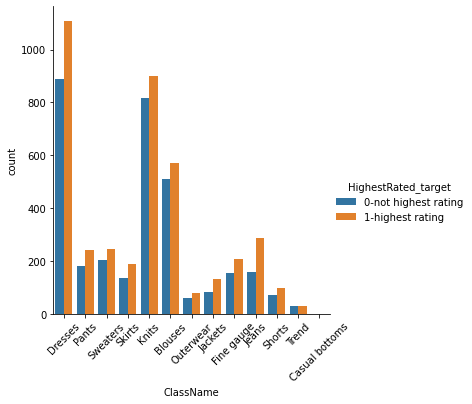

In [ ]:
sns.catplot(x="ClassName", kind="count", hue="HighestRated_target", data=train_data[train_data['DivisionName']=='General'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

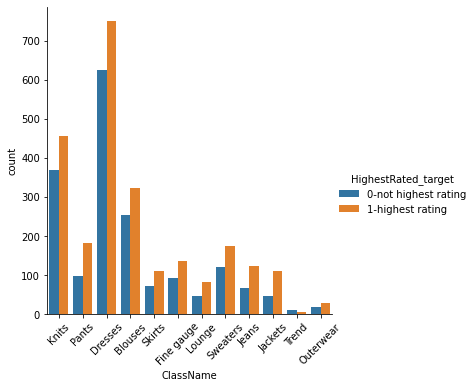

In [ ]:
sns.catplot(x="ClassName", kind="count", hue="HighestRated_target", data=train_data[train_data['DivisionName']=='General Petite'])
plt.xticks(rotation=45)

##department

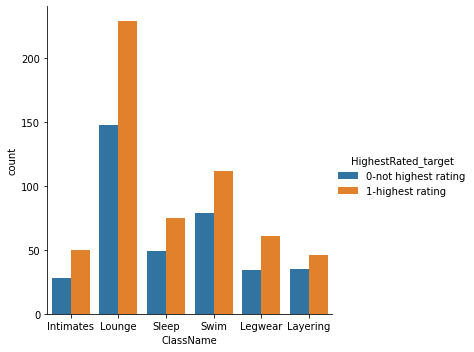

In [ ]:
sns.catplot(x="ClassName", kind="count", hue="HighestRated_target", data=train_data[train_data['DepartmentName']=='Intimate'])

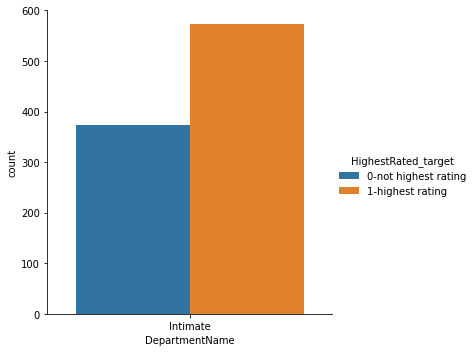

In [ ]:
sns.catplot(x="DepartmentName", kind="count", hue="HighestRated_target", data=train_data[train_data['DepartmentName']=='Intimate'])

Swim seems to be the only one with a high prediction case of 0 as compared to 1.

It appears that the department would have to improve on its swim section.

A way we can proceed with this would be to analyse the demographic purchasing the swimwear and focus on the trends garnered.

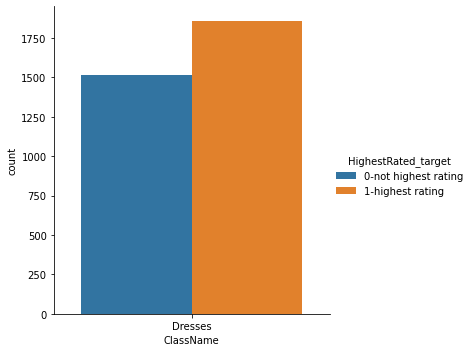

In [ ]:
sns.catplot(x="ClassName", kind="count", hue="HighestRated_target", data=train_data[train_data['DepartmentName']=='Dresses'])

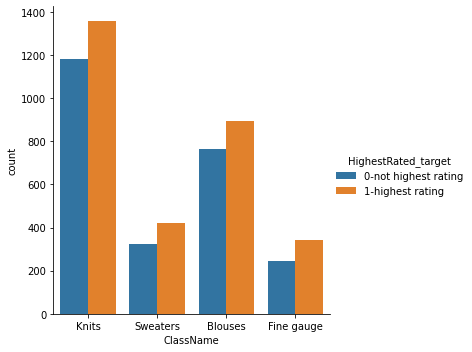

In [ ]:
sns.catplot(x="ClassName", kind="count", hue="HighestRated_target", data=train_data[train_data['DepartmentName']=='Tops'])

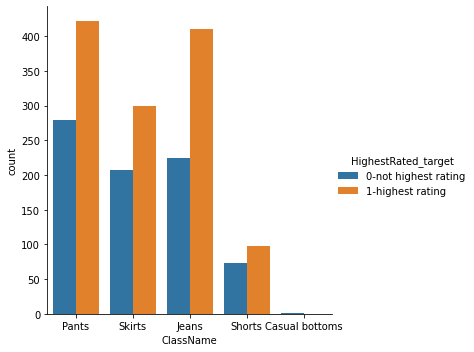

In [ ]:
sns.catplot(x="ClassName", kind="count", hue="HighestRated_target", data=train_data[train_data['DepartmentName']=='Bottoms'])

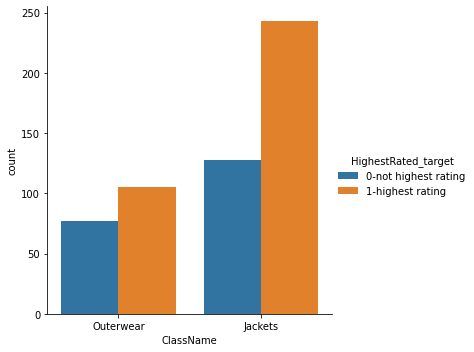

In [ ]:
sns.catplot(x="ClassName", kind="count", hue="HighestRated_target", data=train_data[train_data['DepartmentName']=='Jackets'])

Likewise, it also shows that the outerwear is failing to cater to its audience.
Hence, greater focus must be placed to examining where we are falling short.

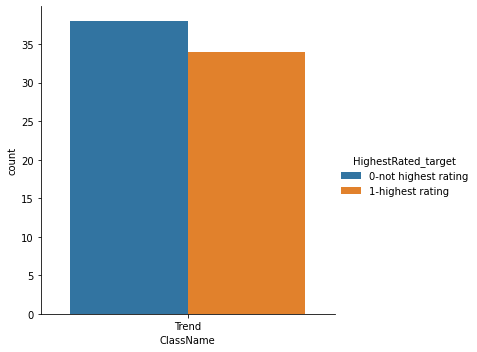

In [ ]:
sns.catplot(x="ClassName", kind="count", hue="HighestRated_target", data=train_data[train_data['DepartmentName']=='Trend'])

Age Demographic Analysis would be suggested for the Swim and Outerwear as it is an area for much needed improvement.

#Model Comparison to Actual Result

In [ ]:
labels = test_data[['HighestRated_target', 'pred']]

In [ ]:
labels['HighestRated_target'] = labels['HighestRated_target'].map({'0-not highest rating':0, '1-highest rating':1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
labels

,HighestRated_target,pred
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
2495,1,1
2496,1,1
2497,1,1
2498,1,1


In [ ]:
import scipy
from scipy.spatial.distance import cosine

In [ ]:
1 - cosine(labels["HighestRated_target"], labels["pred"])

0.8494367742720556

In [ ]:
labels.loc[(labels['HighestRated_target'] == 1) & (labels['pred'] == 1)]

,HighestRated_target,pred
1142,1,1
1143,1,1
1144,1,1
1145,1,1
1147,1,1
...,...,...
2495,1,1
2496,1,1
2497,1,1
2498,1,1


In [ ]:
labels.loc[(labels['HighestRated_target'] == 1) & (labels['pred'] == 0)]

,HighestRated_target,pred
1146,1,0
1152,1,0
1161,1,0
1165,1,0
1182,1,0
...,...,...
2452,1,0
2456,1,0
2471,1,0
2476,1,0


Precision - how well the model captures profit

In [ ]:
1220/(1220+138)

0.898379970544919

In [ ]:
labels.loc[(labels['HighestRated_target'] == 0) & (labels['pred'] == 0)]

,HighestRated_target,pred
0,0,0
2,0,0
4,0,0
5,0,0
8,0,0
...,...,...
1135,0,0
1136,0,0
1138,0,0
1139,0,0


In [ ]:
labels.loc[(labels['HighestRated_target'] == 0) & (labels['pred'] == 1)]

,HighestRated_target,pred
1,0,1
3,0,1
6,0,1
7,0,1
13,0,1
...,...,...
1128,0,1
1131,0,1
1133,0,1
1137,0,1


how well the model avoids loss

In [ ]:
843/(843+299)

0.7381786339754816

In [ ]:
(0.898379970544919+0.7381786339754816)/2

0.8182793022602003